In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
#importing
dataset = sklearn.datasets.fetch_california_housing()

In [4]:
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [7]:
dataframe = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [8]:
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
#add target column
dataframe['Price'] = dataset.target

In [10]:
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
dataframe.shape

(20640, 9)

In [13]:
dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [15]:
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
#understanding the correlation between various features in the dataset

correlation = dataframe.corr()


<Axes: >

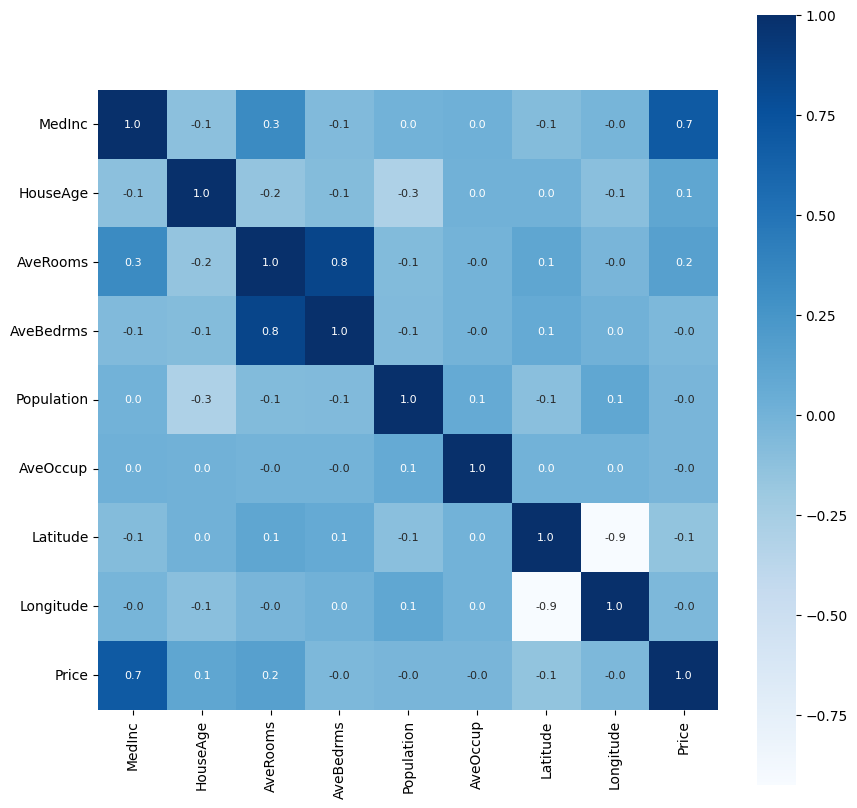

In [ ]:
#constrcting heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square= True, fmt='.1f', annot =True, annot_kws  = {'size':8}, cmap = 'Blues')
#cbar is colourbar at side, square means values mentioned in square, fmt is values after decimal poiint, annot is annotation, then kws is size, cmap is colour

In [18]:
#splitting data and target

X=dataframe.drop(['Price'], axis=1)

Y=dataframe['Price']

In [20]:

print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 2)

In [22]:
print(X.shape, x_train.shape, x_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [23]:
#model training

#decision tree algo type

model = XGBRegressor()

In [ ]:
model.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [25]:
#evaluation, cant use accuracy score

#Prediction first

train_pred =model.predict(x_train)

In [26]:
#R square error and mean absolute error for regression problems instead of accuracy score

score_1 = metrics.r2_score(y_train, train_pred)

score_2 = metrics.mean_absolute_error(y_train, train_pred)

print('R: ', score_1)
print('MAE: ', score_2)

R:  0.943650140819218
MAE:  0.1933648700612105


In [27]:
test_pred =model.predict(x_test)

In [28]:
_score_1 = metrics.r2_score(y_test, test_pred)

_score_2 = metrics.mean_absolute_error(y_test, test_pred)

print('R: ', _score_1)
print('MAE: ', _score_2)

R:  0.8338000331788725
MAE:  0.3108631800268186


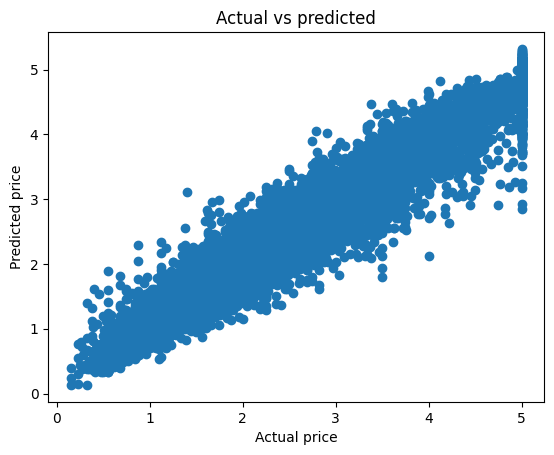

In [29]:
#visualizing prediction

plt.scatter(y_train, train_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs predicted')
plt.show()